In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('ggplot')


In [4]:
df = pd.read_csv('./data/B0C6KFZC9Z_2023-11-29.csv')
df.head()

,asin,text,title,verified,rating,location,date,label,score
0,B0C6KFZC9Z,Build quality is very good you will feel that....,Working well,True,5.0,India,2023-05-12,positive,0.824927
1,B0C6KFZC9Z,The packaging of the product is super premium....,Immersive Sound Quality & Superb ANC Modes,False,5.0,India,2023-07-21,positive,0.675113
2,B0C6KFZC9Z,The Music audio is pretty good. Great to have ...,Good Product,True,5.0,India,2023-08-02,positive,0.875842
3,B0C6KFZC9Z,Very comfortable on the ears & fits snugly/ no...,Great product…. Real value for money.,False,5.0,India,2023-08-05,positive,0.809596
4,B0C6KFZC9Z,ProsVery crisp and clear audioFast connectionS...,Excellent but lacks comfort,True,4.0,India,2023-08-11,negative,0.860607


# Positive Score Graph

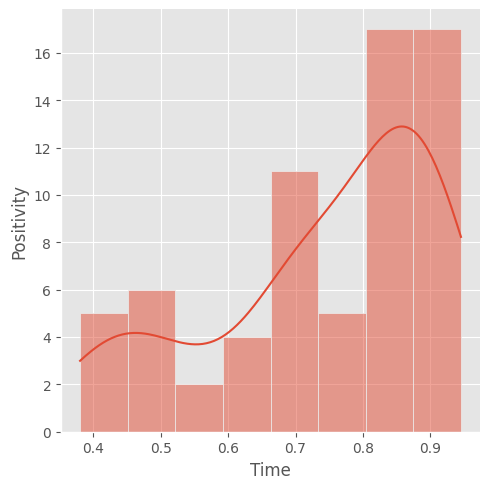

In [27]:
positive_score = df[df['label'] == 'positive']
sns.displot(positive_score['score'], kde = True)

plt.xlabel('Time')
plt.ylabel('Positivity')
plt.show()

# Negative Score Graph

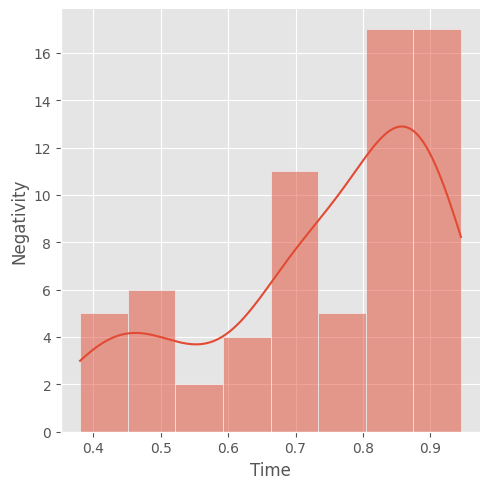

In [28]:
negative_score = df[df['label'] == 'positive']
sns.displot(negative_score['score'], kde = True)

plt.xlabel('Time')
plt.ylabel('Negativity')
plt.show()

# Rating vs Date

# Top Reviews 

In [50]:
Top_positive_review = df.loc[(df['label'] == 'positive') & (df['rating'] == 5.0)]
Top_positive_review.sort_values(by='score', ascending=False, inplace=True)
Top_positive_review = Top_positive_review [['date', 'title','text', 'location' ]]
Top_positive_review.head(10)

C:\Users\ANUSHA BERA\AppData\Local\Temp\ipykernel_4968\4291683660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_positive_review.sort_values(by='score', ascending=False, inplace=True)


,date,title,text,location
153,2023-11-27,Un rapport qualité-prix INCROYABLE,J'ai acheté ce casque il y a maintenant plus d...,France
131,2023-11-26,Satter Sound,Da macht Musik hören richtig Spaß.Hochwertige ...,Germany
136,2023-11-26,Great headset,Awesome sound and lots of features,the United States
140,2023-11-26,Sehr gut,Pünktlich und gute Produkte,Germany
128,2023-11-25,Love it!,Bought these for my Mom. She loves the sound.,the United States
164,2023-11-27,Excepcionales ¡¡,Me han gustado mucho,Spain
59,2023-10-27,Best Headphones available,The Sound Quality is awesomeLooks AwesomeBass ...,India
79,2023-11-05,Best under 10K,"Amazing sound, comfortable fit",India
92,2023-11-11,Good purchase!,First day review - Pretty solid! Sound is amaz...,India
137,2023-11-26,Excelente producto,Cumple con lo requerido y considero es un buen...,the United States


In [51]:
Top_negative_review = df.loc[(df['label'] == 'negative') & (df['rating'] == 1.0)]
Top_negative_review.sort_values(by='score', ascending=False, inplace=True)
Top_negative_review = Top_negative_review [['date', 'title','text', 'location' ]]
Top_negative_review.head(10)

C:\Users\ANUSHA BERA\AppData\Local\Temp\ipykernel_4968\3710467704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_negative_review.sort_values(by='score', ascending=False, inplace=True)


,date,title,text,location
67,2023-10-31,Soundcore Space one headset,Poor quality headphones. ANC sucks.,India
121,2023-11-24,Très mauvais casque,Un très mauvais casque cher fragile même pas 6...,France
162,2023-11-27,Notice cancelling etc..very annoying,Every time you accidentally touch the right ea...,Canada
83,2023-11-07,Worst product ever,Its stopped working in 3 weeks of purchasePlea...,India
146,2023-11-27,Difficult to charge,I left it “charging “ all night but it kept sh...,the United States
161,2023-11-27,Un article de TRES MAUVAISE qualite,"Apres a peine un an d utilisation, les écouteu...",France
123,2023-11-24,Sem garantia no Brasil,Adquiri o fone em mar/2023 por conta do cancel...,Brazil
120,2023-11-24,Muddy bass,"Presentation is Okay, they don't come with the...",Canada
124,2023-11-24,Enttäuscht,Guter Sound aber entlädt sich innerhalb von ei...,Germany


# Critcal Reviews

In [53]:
Critical_Positive = df.loc[(df['label'] == 'positive')]
Critical_Positive.sort_values(by='score', ascending=False, inplace=True)
Critical_Positive = Critical_Positive [['date', 'title','text', 'rating', 'location' ]]
Critical_Positive.head(1)

C:\Users\ANUSHA BERA\AppData\Local\Temp\ipykernel_4968\1342554639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_positive_review.sort_values(by='score', ascending=False, inplace=True)


,date,title,text,rating,location
153,2023-11-27,Un rapport qualité-prix INCROYABLE,J'ai acheté ce casque il y a maintenant plus d...,5.0,France


In [56]:
Critical_Negative = df.loc[(df['label'] == 'negative')]
Critical_Negative.sort_values(by='score', ascending=False, inplace=True)
Critical_Negative = Critical_Negative [['date', 'title','text', 'rating', 'location' ]]
Critical_Negative.head(1)

C:\Users\ANUSHA BERA\AppData\Local\Temp\ipykernel_4968\2858012145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Critical_Negative.sort_values(by='score', ascending=False, inplace=True)


,date,title,text,rating,location
98,2023-11-16,Sottocarica NON FUNZIONANO,Carine esteticamente. Materiali alla fine buon...,3.0,Italy
